<a href="https://colab.research.google.com/github/Rajat1393/Data-Extraction/blob/main/TextPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import spacy
import nltk

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
!pip install goose3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 888.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.1 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=764d89d5fee254b10e555e0c7c01e6347d56fa0ac60d5cb2264c7eaa16886f2e
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [4]:
from goose3 import Goose
g = Goose()


In [5]:
url = 'https://en.wikipedia.org/wiki/Natural_language_processing'

In [6]:
article = g.extract(url)

In [7]:
article.title

'Natural language processing - Wikipedia'

In [8]:
article.cleaned_text

'Natural language processing (NLP) is an interdisciplinary subfield of linguistics and computer science. It is primarily concerned with processing natural language datasets, such as text corpora or speech corpora, using either rule-based or probabilistic (i.e. statistical and, most recently, neural network-based) machine learning approaches. The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.\n\nNatural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence. The proposed test includes a

In [9]:
article.links

['/wiki/NLP_(disambiguation)',
 '/wiki/Language_processing_in_the_brain',
 '/wiki/Interdisciplinary',
 '/wiki/Linguistics',
 '/wiki/Computer_science',
 '/wiki/Natural_language',
 '/wiki/Text_corpus',
 '/wiki/Machine_learning',
 '/wiki/Context_(language_use)',
 '/wiki/Speech_recognition',
 '/wiki/Natural-language_understanding',
 '/wiki/Natural_language_generation',
 '/w/index.php?title=Natural_language_processing&action=edit&section=1',
 '/wiki/History_of_natural_language_processing',
 '/wiki/Alan_Turing',
 '/wiki/Computing_Machinery_and_Intelligence',
 '/wiki/Turing_test',
 '/w/index.php?title=Natural_language_processing&action=edit&section=2',
 '/wiki/John_Searle',
 '/wiki/Chinese_room',
 '/wiki/Georgetown-IBM_experiment',
 '/wiki/Automatic_translation',
 '#cite_note-1',
 '/wiki/ALPAC',
 '#cite_note-2',
 '/wiki/Statistical_machine_translation',
 '/wiki/SHRDLU',
 '/wiki/Blocks_world',
 '/wiki/ELIZA',
 '/wiki/Rogerian_psychotherapy',
 '/wiki/Joseph_Weizenbaum',
 '/w/index.php?title=Ros

In [10]:
from spacy import displacy

In [11]:
document = nlp(article.cleaned_text)

In [12]:
displacy.render(document,style = 'ent',jupyter=True)

In [13]:
for entity in document.ents:
  if entity.label_ == 'PERSON':
    print(entity.text)

Alan Turing
John Searle's
Joseph Weizenbaum
Ross Quillian's
SAM
Wilensky
QUALM
Lehnert
Lehnert
Lesk
Centering
Jabberwacky
Chomskyan
Yoshua Bengio
Tomáš Mikolov
modeling[12
Markov
George Lakoff
Lakoff


In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
tokens = nltk.tokenize.word_tokenize(article.cleaned_text)

In [ ]:
tokens

In [17]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
stops = set(stopwords.words('english'))

In [19]:
frequency = nltk.FreqDist(tokens)

In [20]:
most_common = frequency.most_common(10)
most_common

[(',', 167),
 ('the', 114),
 ('of', 99),
 ('.', 77),
 ('and', 49),
 ('in', 46),
 ('a', 45),
 ('(', 41),
 (')', 41),
 ('to', 39)]

In [21]:
from wordcloud import WordCloud

In [22]:
cloud = WordCloud()
cloud = cloud.generate(article.cleaned_text)

(-0.5, 399.5, 199.5, -0.5)

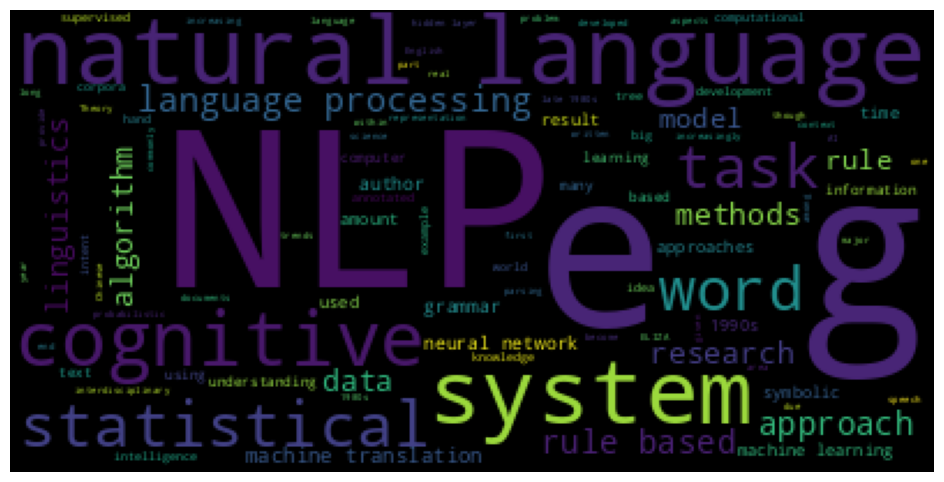

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.imshow(cloud)
plt.axis('off')

In [71]:
def preprocessing(sentence):
  sentence = sentence.lower()
  sentence = sentence.replace('.',' ')
  tokens = []
  tokens = [token.text for token in nlp(sentence) if not(token.is_stop or token.is_digit or token.is_punct or token.is_space or len(token)<=1)]
  tokens = ' '.join(token for token in tokens)
  return tokens




In [72]:
cleaned_text = preprocessing(article.cleaned_text)

In [53]:
print(len(article.cleaned_text),len(cleaned_text))

14365 10014


In [55]:
import wordcloud
cloud = WordCloud()

In [56]:
cloud = cloud.generate(cleaned_text)

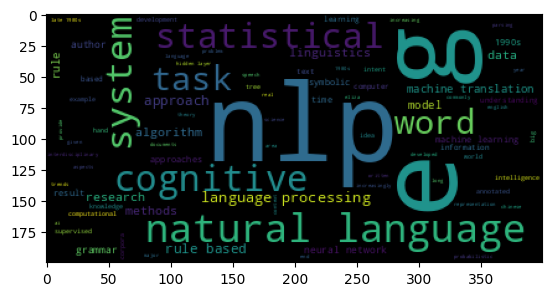

In [58]:
plt.imshow(cloud)

In [73]:
cleaned_text = nltk.tokenize.word_tokenize(cleaned_text)
frequency = nltk.FreqDist(cleaned_text)

In [74]:
most_cmn = frequency.most_common(10)

In [75]:
most_cmn

[('language', 27),
 ('nlp', 20),
 ('[', 20),
 ('natural', 17),
 ('based', 15),
 ('machine', 14),
 ('cognitive', 14),
 ('statistical', 13),
 ('systems', 13),
 ('processing', 12)]